# Problem Statement

## Decision Tree
Build a classification model with Decision Trees. The main objective is to use the two splitting criteria of Gini index and Entropy and observe the performance of the decision tree on the given data set. It is a real dataset about the students' knowledge status about the subject of Electrical DCMachines.

The attribute information is as given below:

Column Position | Attribute Name | Definition |  Data Type
--- | --- | --- | ---
1 |  STG |  The degree of study time for goal object materials | Quantitative
2 | SCG | The degree of repetition number of user for goal object materials | Quantitative
3 | STR | The degree of study time of user for related objects with goal object |  Quantitative
4 | LPR | The exam performance of user for related objects with goal object | Quantitative
5 | PEG | The exam performance of user for goal objects | Quantitative
6 | UNS | The knowledge level of user (Very Low, Low, Middle, High) | Quantitative





# Solution

## Prerequisites

### Import the required libraries

In [397]:
import pandas as pd
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import six
from IPython.core.formatters import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1: Load the dataset and print the metadata


In [398]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [399]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Assignment_3_Classification/Predict_student_ knowledge_level (1).csv')

In [400]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,NaN
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,NaN
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,NaN
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,NaN
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,NaN


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STG         403 non-null    float64
 1   SCG         403 non-null    float64
 2   STR         403 non-null    float64
 3   LPR         403 non-null    float64
 4   PEG         403 non-null    float64
 5    UNS        403 non-null    object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), object(1)
memory usage: 28.5+ KB


In [402]:
df.describe()

,STG,SCG,STR,LPR,PEG,Unnamed: 6,Unnamed: 7,Unnamed: 8
count,403.000000,403.000000,403.000000,403.000000,403.000000,0.0,0.0,0.0
mean,0.353141,0.355940,0.457655,0.431342,0.456360,NaN,NaN,NaN
std,0.212018,0.215531,0.246684,0.257545,0.266775,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.200000,0.200000,0.265000,0.250000,0.250000,NaN,NaN,NaN
50%,0.300000,0.300000,0.440000,0.330000,0.400000,NaN,NaN,NaN
75%,0.480000,0.510000,0.680000,0.650000,0.660000,NaN,NaN,NaN
max,0.990000,0.900000,0.950000,0.990000,0.990000,NaN,NaN,NaN


<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The info command provides the metadata details for the dataset. By default it returns "verbose = True". The describe function provides statistical details about the dataset.</font>

## Task 2: Print a heatmap to check NULL values and Correlation values.


<ipython-input-403-c30bd957a166>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr(method='pearson')


,STG,SCG,STR,LPR,PEG,Unnamed: 6,Unnamed: 7,Unnamed: 8
STG,1.000000,0.049023,-0.051889,0.113957,0.198629,NaN,NaN,NaN
SCG,0.049023,1.000000,0.121235,0.119716,0.193566,NaN,NaN,NaN
STR,-0.051889,0.121235,1.000000,0.083423,0.148338,NaN,NaN,NaN
LPR,0.113957,0.119716,0.083423,1.000000,-0.039283,NaN,NaN,NaN
PEG,0.198629,0.193566,0.148338,-0.039283,1.000000,NaN,NaN,NaN
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


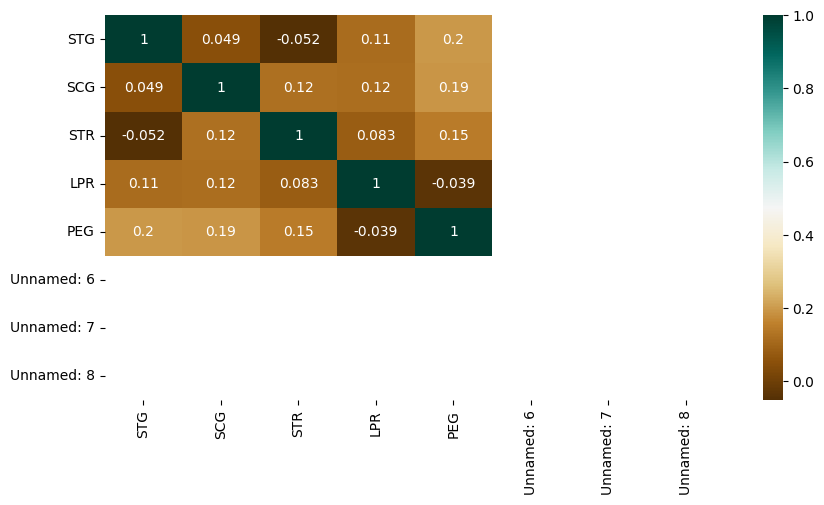

In [403]:
plt.figure(figsize=(10,5))
c= df.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)
c

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The above heatmap shows that "Unnamed:6", "Unnamed:7" and "Unnamed:8" columns have null values.
Also, the highest correlation value is '0.2' which is for PEG and STG features</font>

## Task 3: Perform stratified splitting of train and test data to ensure similar class distribution.


Before we proceed with splitting we have to clean up the data.

In [404]:
df[' UNS'].unique()

array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object)

As you can see the unique values of "UNS" column have logical duplicates, so let's clean it up.

In [405]:
# encoding
scale_mapper = {"very_low":"Very Low", "Very Low": "Very Low", "Low": "Low", "Middle":"Middle", "High":"High"}
df[" UNS"] = df[" UNS"].replace(scale_mapper)
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.00,0.00,0.00,0.00,0.00,Very Low,NaN,NaN,NaN
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,NaN
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,NaN
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,NaN
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,NaN


In [406]:
df[' UNS'].unique()

array(['Very Low', 'High', 'Low', 'Middle'], dtype=object)

As you can see there are 3 columns with no meaningful data or column name, so lets remove them for our model building exercise.



In [407]:
# feature selection
feature_cols = ["STG", "SCG", "STR", "LPR", "PEG"]
X = df[feature_cols]
y = df[" UNS"]

In [408]:
# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0, stratify=y)

<font color="orange">Observations & Justifications:</font>
<font color="darkcyan"> The dataset is now split with train and test samples.</font>

## Task 4: Build a classifier model using Gini index as splitting criteria and Decision Tree and plot the same. 


In [409]:
# build the tree
classifier_g_1 = DecisionTreeClassifier()
classifier_g_1 = classifier_g_1.fit(X_train, y_train)

In [410]:
# predict
y_pred_g_1 = classifier_g_1.predict(X_test)

In [411]:
print("Accuracy for Gini index as splitting criteria:", accuracy_score(y_test, y_pred_g_1))

Accuracy for Gini index as splitting criteria: 0.9074074074074074


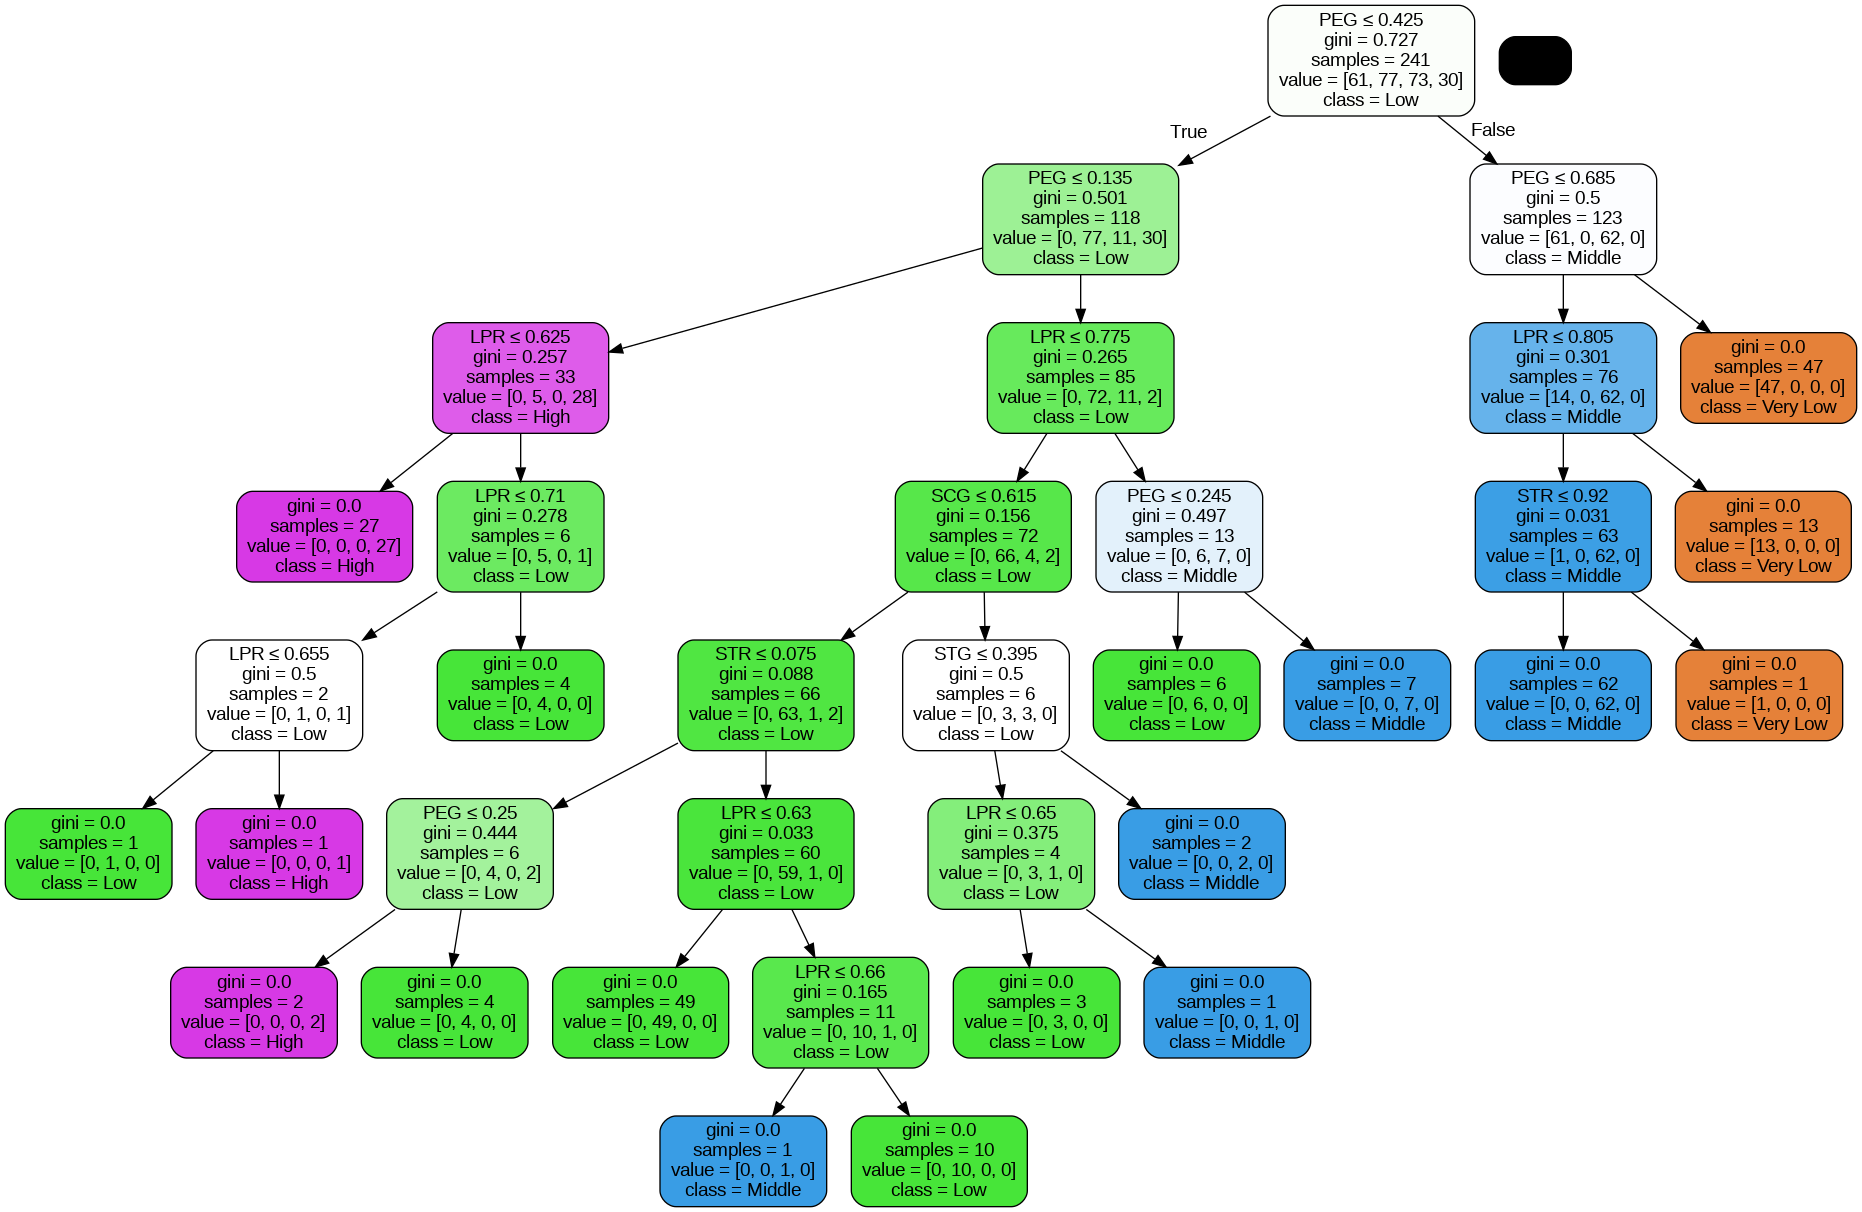

In [412]:
dot_data = StringIO()
export_graphviz(classifier_g_1, out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low', 'Middle', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("student_knowledge_level.png")
Image(graph.create_png())

### Pruning

In [413]:
# build the tree
md = 3
classifier_g_2 = DecisionTreeClassifier(max_depth = md)
classifier_g_2 = classifier_g_2.fit(X_train, y_train)

In [414]:
# predict
y_pred_g_2 = classifier_g_2.predict(X_test)

In [415]:
print("Accuracy for Gini index as splitting criteria after pruning:", accuracy_score(y_test, y_pred_g_2))

Accuracy for Gini index as splitting criteria after pruning: 0.9320987654320988


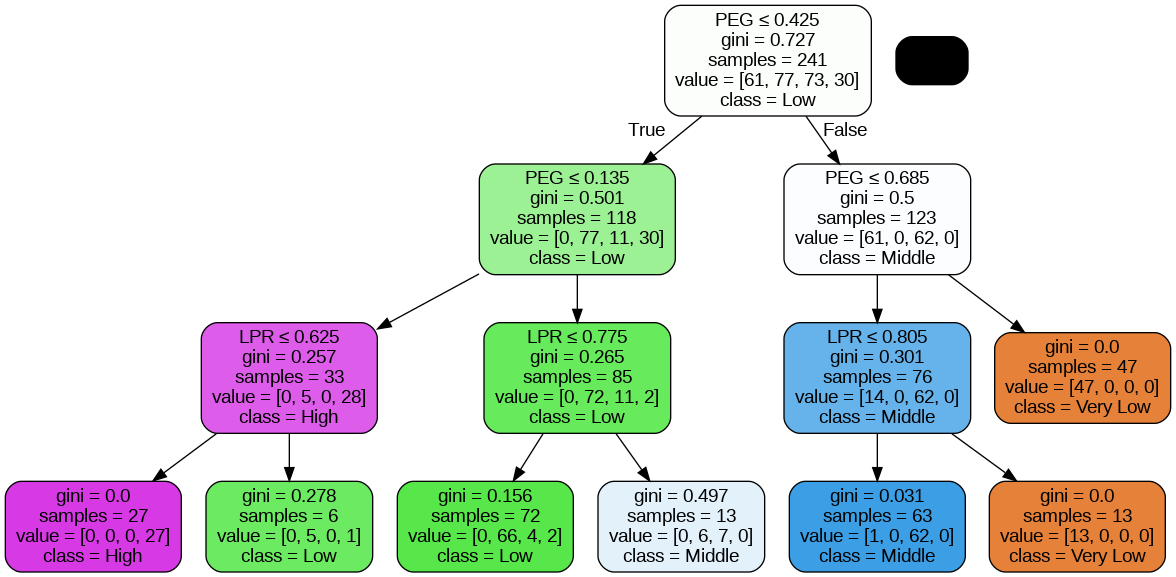

In [416]:
dot_data = StringIO()
export_graphviz(classifier_g_2, out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low', 'Middle', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("student_knowledge_level.png")
Image(graph.create_png())

## Task 5: Build a classifier model using Entropy as splitting criteria and Decision Tree and plot the same 


### Pruning

- `criterion="entropy"` and `max_depth=4`


- `max_depth`: If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.


- The `higher` value of maximum depth causes `overfitting`, and a `lower value` causes `underfitting`


- `criterion`: `entropy` for the information gain.

In [417]:
classifier_e_1 = DecisionTreeClassifier(criterion="entropy")

In [418]:
classifier_e_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [419]:
y_pred_e_1 = classifier_e_1.predict(X_test)

In [420]:
print("Accuracy for Entropy as splitting criteria:", accuracy_score(y_test, y_pred_e_1))

Accuracy for Entropy as splitting criteria: 0.9259259259259259


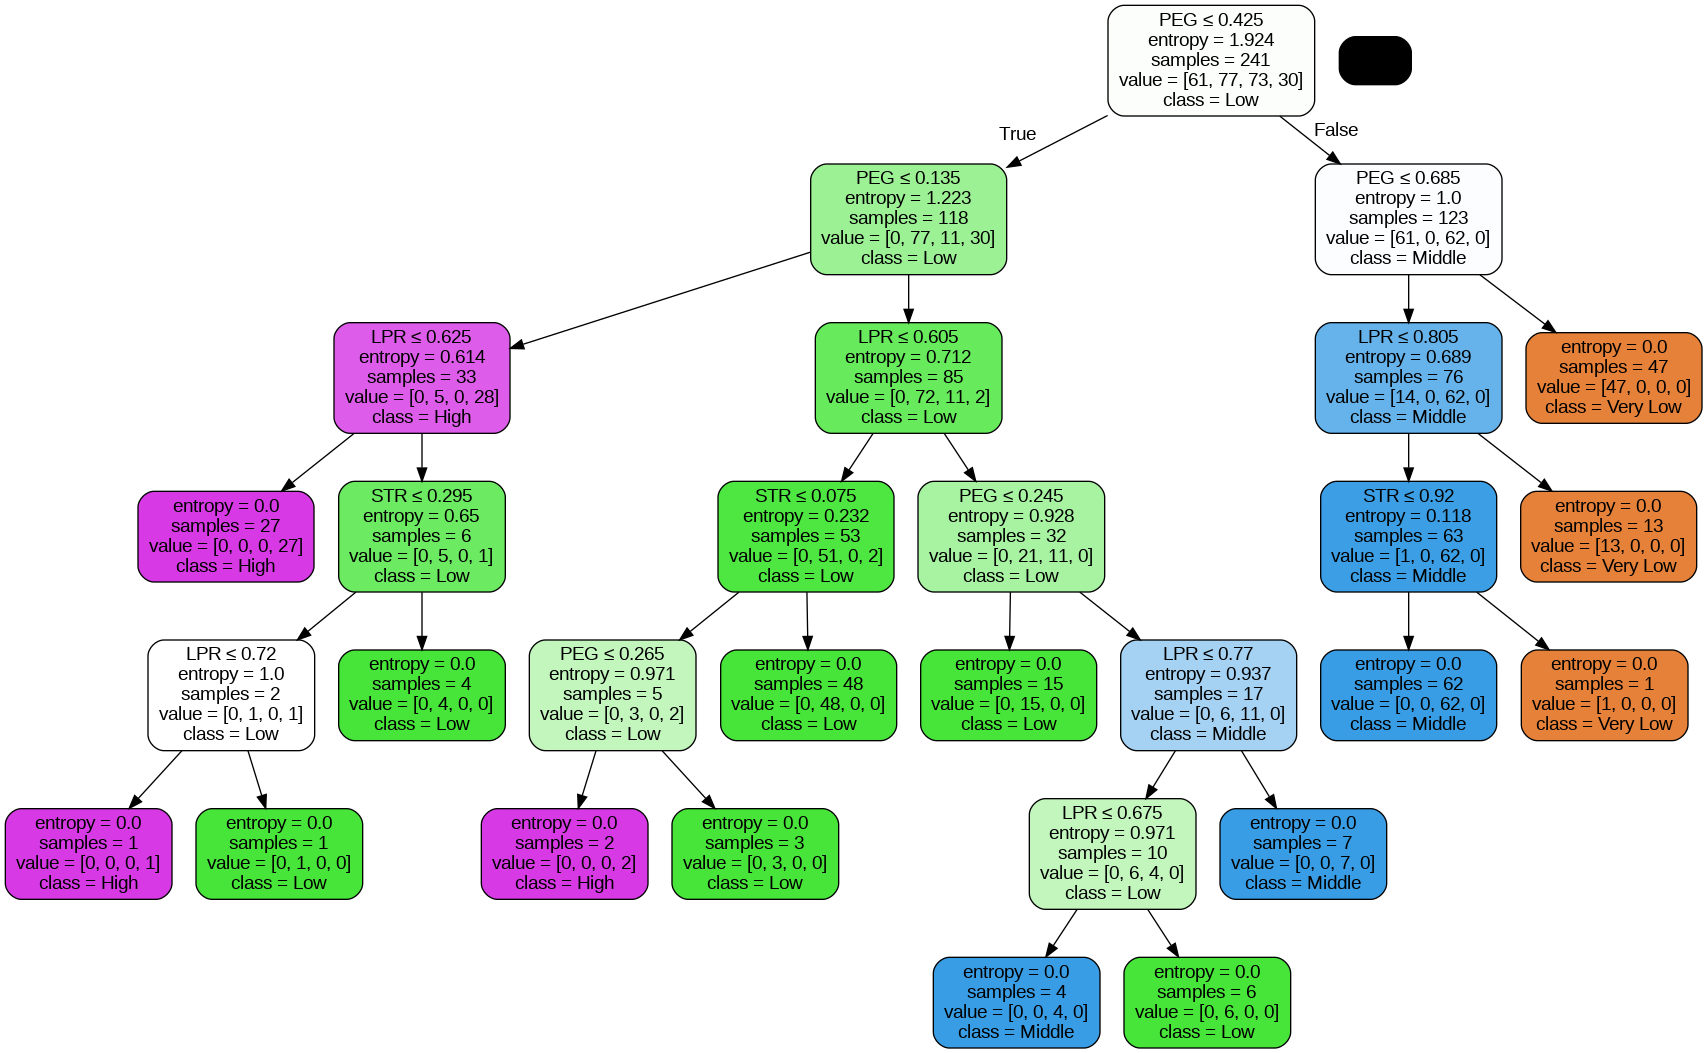

In [421]:
dot_data = StringIO()
export_graphviz(classifier_e_1, out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low', 'Middle', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student_knowledge_level_pruning')
Image(graph.create_png())

In [422]:
classifier_e_2 = DecisionTreeClassifier(criterion="entropy", max_depth = md)

In [423]:
classifier_e_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [424]:
y_pred_e_2 = classifier_e_2.predict(X_test)

In [425]:
print("Accuracy for Entropy as splitting criteria after pruning:", accuracy_score(y_test, y_pred_e_2))

Accuracy for Entropy as splitting criteria after pruning: 0.8765432098765432


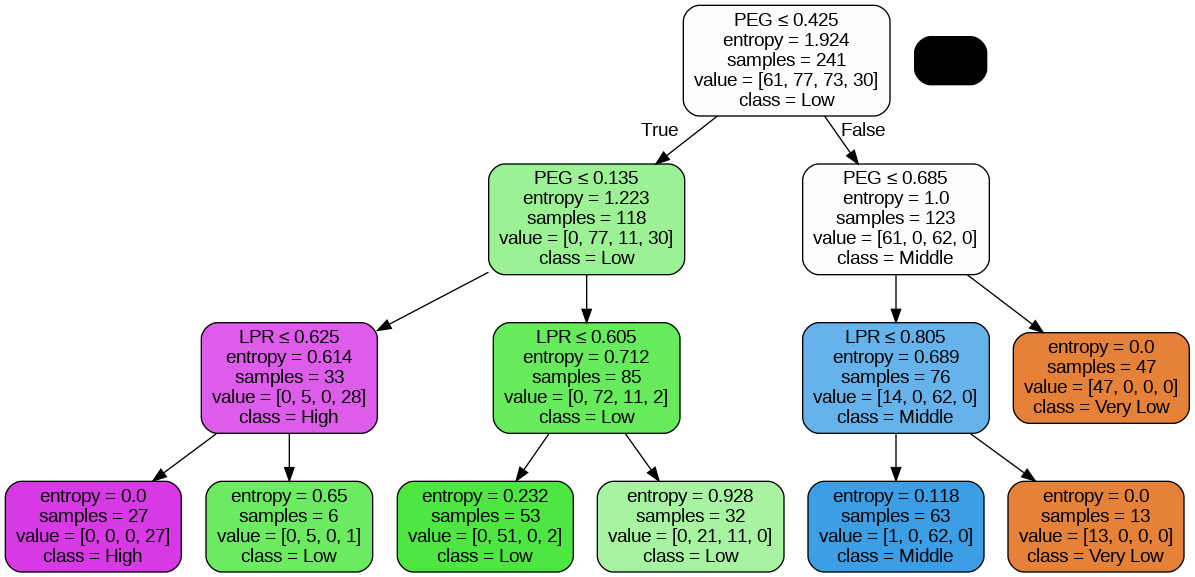

In [426]:
dot_data = StringIO()
export_graphviz(classifier_e_2, out_file=dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low', 'Middle', 'High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student_knowledge_level_pruning')
Image(graph.create_png())

### Analysing the trees

In [427]:
print("Accuracy for Gini index as splitting criteria:", accuracy_score(y_test, y_pred_g_1))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_g_2))
print("Accuracy for Entropy as splitting criteria:", accuracy_score(y_test, y_pred_e_1))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_e_2))

Accuracy for Gini index as splitting criteria: 0.9074074074074074
Accuracy for Gini index as splitting criteria after pruning using max_depth = 3: 0.9320987654320988
Accuracy for Entropy as splitting criteria: 0.9259259259259259
Accuracy for Entropy as splitting criteria after pruning using max_depth = 3: 0.8765432098765432


Let's change the max_depth to 4 and then analyse the results again

In [428]:
md_2 = 4

In [429]:
classifier_g_3 = DecisionTreeClassifier(max_depth = md_2)

In [430]:
classifier_g_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [431]:
y_pred_g_3 = classifier_g_3.predict(X_test)

In [432]:
classifier_e_3 = DecisionTreeClassifier(criterion="entropy", max_depth = md_2)

In [433]:
classifier_e_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [434]:
y_pred_e_3 = classifier_e_3.predict(X_test)

In [435]:
print("Accuracy for Gini index as splitting criteria:", accuracy_score(y_test, y_pred_g_1))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_g_2))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md_2}:", accuracy_score(y_test, y_pred_g_3))
print("Accuracy for Entropy as splitting criteria:", accuracy_score(y_test, y_pred_e_1))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_e_2))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md_2}:", accuracy_score(y_test, y_pred_e_3))

Accuracy for Gini index as splitting criteria: 0.9074074074074074
Accuracy for Gini index as splitting criteria after pruning using max_depth = 3: 0.9320987654320988
Accuracy for Gini index as splitting criteria after pruning using max_depth = 4: 0.9197530864197531
Accuracy for Entropy as splitting criteria: 0.9259259259259259
Accuracy for Entropy as splitting criteria after pruning using max_depth = 3: 0.8765432098765432
Accuracy for Entropy as splitting criteria after pruning using max_depth = 4: 0.9320987654320988


Let's change the max_depth to 5 and then analyse the results again

In [436]:
md_3 = 5

In [437]:
classifier_g_4 = DecisionTreeClassifier(max_depth = md_3)

In [438]:
classifier_g_4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [439]:
y_pred_g_4 = classifier_g_4.predict(X_test)

In [440]:
classifier_e_4 = DecisionTreeClassifier(criterion="entropy", max_depth = md_3)

In [441]:
classifier_e_4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [384]:
y_pred_e_4 = classifier_e_4.predict(X_test)

In [442]:
print("Accuracy for Gini index as splitting criteria:", accuracy_score(y_test, y_pred_g_1))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_g_2))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md_2}:", accuracy_score(y_test, y_pred_g_3))
print(f"Accuracy for Gini index as splitting criteria after pruning using max_depth = {md_3}:", accuracy_score(y_test, y_pred_g_4))

print("Accuracy for Entropy as splitting criteria:", accuracy_score(y_test, y_pred_e_1))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md}:", accuracy_score(y_test, y_pred_e_2))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md_2}:", accuracy_score(y_test, y_pred_e_3))
print(f"Accuracy for Entropy as splitting criteria after pruning using max_depth = {md_3}:", accuracy_score(y_test, y_pred_e_4))

Accuracy for Gini index as splitting criteria: 0.9074074074074074
Accuracy for Gini index as splitting criteria after pruning using max_depth = 3: 0.9320987654320988
Accuracy for Gini index as splitting criteria after pruning using max_depth = 4: 0.9197530864197531
Accuracy for Gini index as splitting criteria after pruning using max_depth = 5: 0.9197530864197531
Accuracy for Entropy as splitting criteria: 0.9259259259259259
Accuracy for Entropy as splitting criteria after pruning using max_depth = 3: 0.8765432098765432
Accuracy for Entropy as splitting criteria after pruning using max_depth = 4: 0.9320987654320988
Accuracy for Entropy as splitting criteria after pruning using max_depth = 5: 0.9197530864197531


<font color="orange">Observations & Justifications:</font>

<font color="darkcyan">
Case 1 (default) - As you can see the accuracy score with Gini index is ~90% and with Entropy it is ~92%.
</font>

<font color="darkcyan">
Case 2 - After pruning using max_depth as 3 the accuracy increased to ~93% for Gini index while it reduced for Entropy to ~88%.
</font>

<font color="darkcyan">
Case 3 - After pruning using max_depth as 4 the accuracy increased to ~92% for Gini index and it increased for entropy to ~93%%.
 </font>

 <font color="darkcyan">
Case 4 - After pruning using max_depth as 5 the accuracy increaded to ~91% for Gini index and it remained same for entropy at ~92%%.
 </font>

  <font color="darkcyan">
hence we can use max_depth as 4 as ideal for further analysis
 </font>

## Task 6: Print confusion matrix and classification report before and after pruning the Decision tree. 


### Before Pruning

[[40  0  1  0]
 [ 0 47  5  0]
 [ 1  5 43  0]
 [ 0  3  0 17]]


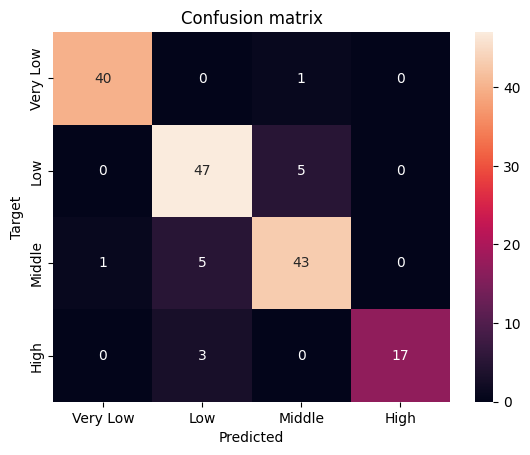

In [443]:
# evaluate the model
cm_g = confusion_matrix(y_test, y_pred_g_1)
print(confusion_matrix(y_test, y_pred_g_1))
sns.heatmap(cm_g, annot=True, xticklabels=['Very Low','Low', 'Middle', 'High'],
            yticklabels=['Very Low','Low', 'Middle', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

[[40  0  1  0]
 [ 0 50  0  2]
 [ 1  5 43  0]
 [ 0  3  0 17]]


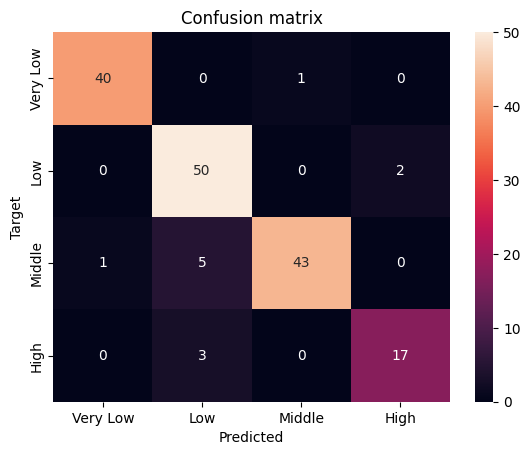

In [444]:
cm_e = confusion_matrix(y_test, y_pred_e_1)
print(confusion_matrix(y_test, y_pred_e_1))
sns.heatmap(cm_e, annot=True, xticklabels=['Very Low','Low', 'Middle', 'High'],
            yticklabels=['Very Low','Low', 'Middle', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

In [445]:
# classification report
print("\nClassification report for Gini Index as splitting criteria\n", classification_report(y_test,y_pred_g_1))
print("\nClassification report for Entropy as splitting criteria\n", classification_report(y_test,y_pred_e_1))


Classification report for Gini Index as splitting criteria
               precision    recall  f1-score   support

        High       0.98      0.98      0.98        41
         Low       0.85      0.90      0.88        52
      Middle       0.88      0.88      0.88        49
    Very Low       1.00      0.85      0.92        20

    accuracy                           0.91       162
   macro avg       0.93      0.90      0.91       162
weighted avg       0.91      0.91      0.91       162


Classification report for Entropy as splitting criteria
               precision    recall  f1-score   support

        High       0.98      0.98      0.98        41
         Low       0.86      0.96      0.91        52
      Middle       0.98      0.88      0.92        49
    Very Low       0.89      0.85      0.87        20

    accuracy                           0.93       162
   macro avg       0.93      0.92      0.92       162
weighted avg       0.93      0.93      0.93       162



### After Pruning

[[40  0  1  0]
 [ 0 52  0  0]
 [ 1  6 42  0]
 [ 0  5  0 15]]


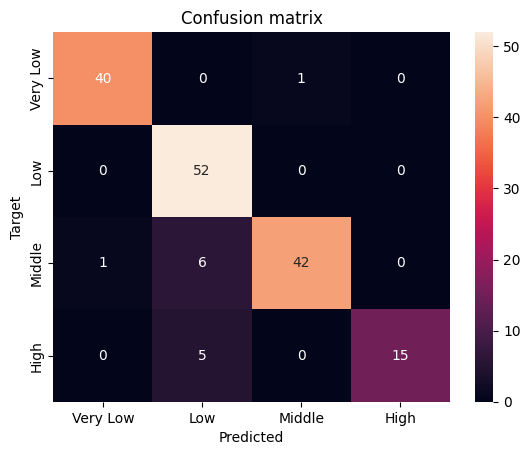

In [446]:
# evaluate the model
cm_g = confusion_matrix(y_test, y_pred_g_3)
print(confusion_matrix(y_test, y_pred_g_3))
sns.heatmap(cm_g, annot=True, xticklabels=['Very Low','Low', 'Middle', 'High'],
            yticklabels=['Very Low','Low', 'Middle', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

[[40  0  1  0]
 [ 0 50  2  0]
 [ 1  2 46  0]
 [ 0  5  0 15]]


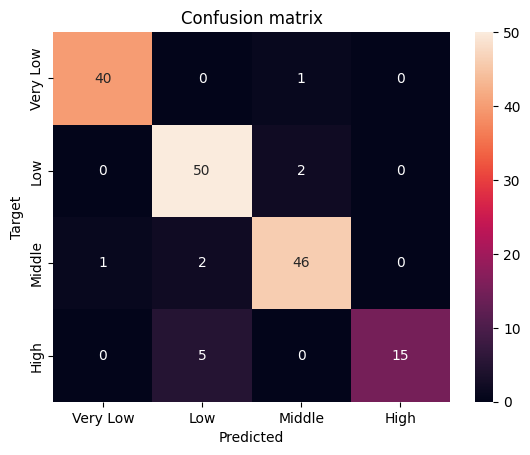

In [447]:
cm_e = confusion_matrix(y_test, y_pred_e_3)
print(confusion_matrix(y_test, y_pred_e_3))
sns.heatmap(cm_e, annot=True, xticklabels=['Very Low','Low', 'Middle', 'High'],
            yticklabels=['Very Low','Low', 'Middle', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
plt.show()

In [448]:
# classification report
print(f"\nClassification report for Gini Index as splitting criteria and max_depth = {md_2}\n", classification_report(y_test,y_pred_g_3))
print(f"\nClassification report for Entropy as splitting criteria and max_depth = {md_2}\n", classification_report(y_test,y_pred_e_3))


Classification report for Gini Index as splitting criteria and max_depth = 4
               precision    recall  f1-score   support

        High       0.98      0.98      0.98        41
         Low       0.83      1.00      0.90        52
      Middle       0.98      0.86      0.91        49
    Very Low       1.00      0.75      0.86        20

    accuracy                           0.92       162
   macro avg       0.94      0.90      0.91       162
weighted avg       0.93      0.92      0.92       162


Classification report for Entropy as splitting criteria and max_depth = 4
               precision    recall  f1-score   support

        High       0.98      0.98      0.98        41
         Low       0.88      0.96      0.92        52
      Middle       0.94      0.94      0.94        49
    Very Low       1.00      0.75      0.86        20

    accuracy                           0.93       162
   macro avg       0.95      0.91      0.92       162
weighted avg       0.94      0

## Task 7: Compare the influence of Entropy and Gini index on the performance of the algorithm

As you can see from the classification reports, the results are similar.
*   Precision: the ability of a classification model to return only the data points in a class.
*   Recall: the ability of a classification model to identify all data points in a relevant class.  
*   F1 score: a single metric that combines recall and precision using the harmonic mean.

The precision and recall both improved by using entropy as the splitting criteria and with max depth as 4.